In [1]:
import pandas as pd
import os
import utils
# update this notebook when external scripts are changed
%load_ext autoreload
%autoreload 2

In [2]:
DATA_PATH = "C:\\data\\time_series_data\\archive\\vgsales.csv"
assert(os.path.exists(DATA_PATH))
df = pd.read_csv(DATA_PATH)
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


各社ソフトの世界における販売数を考える。
見るべきカラムは
- Publisher
- Year
- Global_Sales


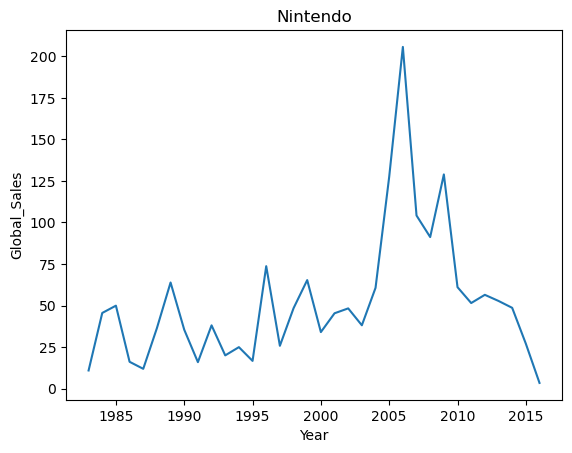

In [3]:
name = "Nintendo"
df_nintendo = utils.load_data(DATA_PATH, name)
utils.draw_plot(df_nintendo, name)

In [4]:
utils.evaluate_kpss(df_nintendo)

The first KPSS: 0.04912230775149182
The second KPSS: 0.1


c:\Users\seiya.kumada\Anaconda3\envs\pmdarima\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


任天堂は一回差分を取る。

The first KPSS: 0.1
The second KPSS: 0.1


c:\Users\seiya.kumada\Anaconda3\envs\pmdarima\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
c:\Users\seiya.kumada\Anaconda3\envs\pmdarima\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


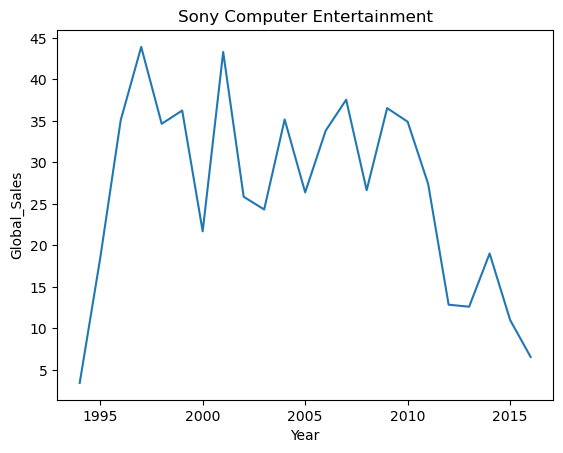

In [5]:
name = "Sony Computer Entertainment" 
df_sony = utils.load_data(DATA_PATH, name)
utils.draw_plot(df_sony, name)
utils.evaluate_kpss(df_sony)

Sonyは差分を取らない。

The first KPSS: 0.01
The second KPSS: 0.1


c:\Users\seiya.kumada\Anaconda3\envs\pmdarima\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
c:\Users\seiya.kumada\Anaconda3\envs\pmdarima\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


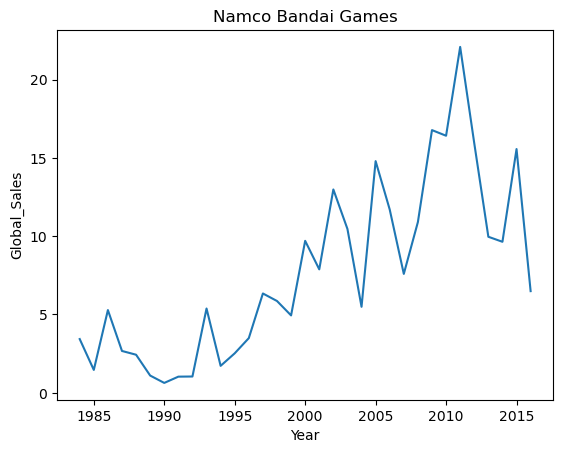

In [6]:
name = "Namco Bandai Games"
df_bandai = utils.load_data(DATA_PATH, name)
utils.draw_plot(df_bandai, name)
utils.evaluate_kpss(df_bandai)

バンダイは一回差分を取る。

The first KPSS: 0.1
The second KPSS: 0.1


c:\Users\seiya.kumada\Anaconda3\envs\pmdarima\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
c:\Users\seiya.kumada\Anaconda3\envs\pmdarima\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


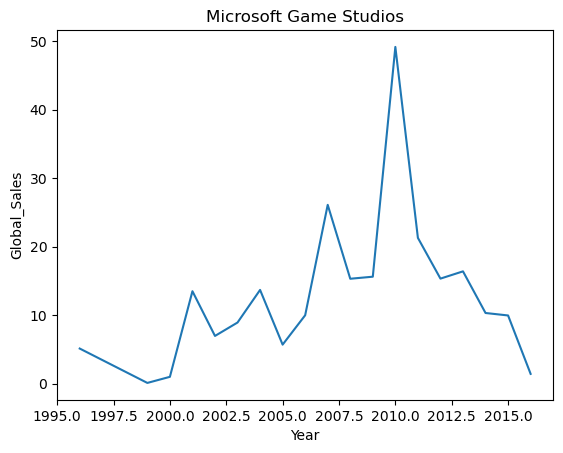

In [7]:
name = "Microsoft Game Studios"
df_ms = utils.load_data(DATA_PATH, name)
utils.draw_plot(df_ms, name)
utils.evaluate_kpss(df_ms)

MSは差分を取らない。

自己相関を見る。

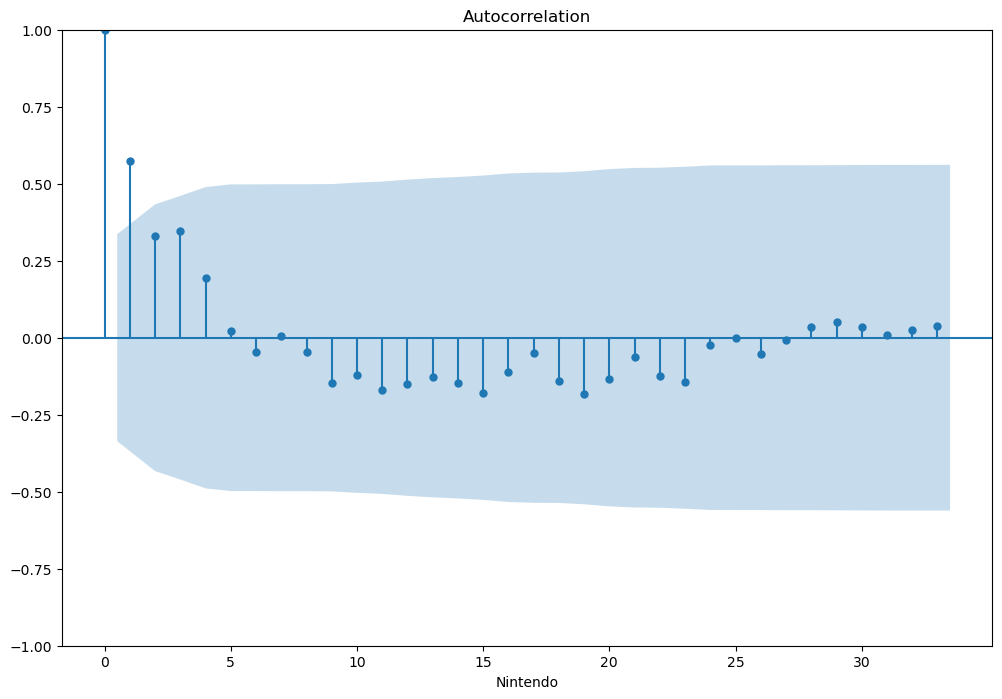

In [9]:
utils.calculate_auto_correlation(33, 5, df_nintendo["Global_Sales"], "../images/auto_corr_nintendo.png", "Nintendo")

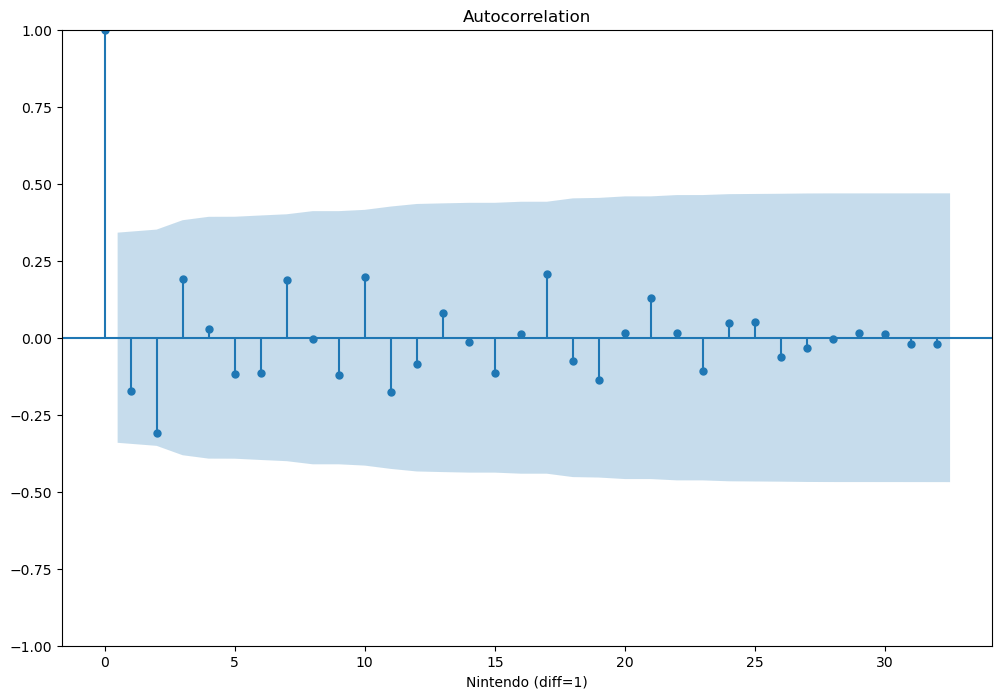

In [12]:
df_nintendo_diff_1 = utils.calculate_diff(df_nintendo, 1)
utils.calculate_auto_correlation(
    32, 5, df_nintendo_diff_1["Global_Sales"], 
    "../images/auto_corr_nintendo_diff_1.png", "Nintendo (diff=1)")
